In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import datetime
%matplotlib inline

In [6]:
from subprocess import check_output
print(check_output(["ls", "/Users/apple/Documents/2021 summer intern"]).decode("utf8"))

2021 summer internship application.pages
CV.pdf
Helen Ren_cl_updated.doc
Helen_CV_research.docx
Helen_CV_research.pdf
Helen_Resume_DA.docx
Helen_updated.docx
My Uber Drives - 2016.csv
additional documents.pdf
archive
brain_tumor_detection.ipynb
checkpoint
recommandation system.ipynb
uber_drive_data_analysis.ipynb



In [8]:
uber_df=pd.read_csv("/Users/apple/Documents/2021 summer intern/My Uber Drives - 2016.csv")
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
#remove unnecessary data
uber_df = uber_df[:-1]

In [10]:
def convert_time(column_name):
    y=[]
    for x in uber_df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    uber_df[column_name] = y

In [11]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [13]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


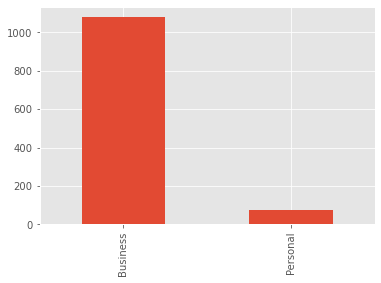

In [14]:
# plot number of trip at each category
x = uber_df['CATEGORY*'].value_counts().plot(kind='bar')

In [15]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month

In [16]:
# calculate duration of each trip in minutes
minutes=[]
uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['Duration_Minutes']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber_df['Duration_Minutes'] = minutes

In [23]:
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Duration_Minutes
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,12,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12,103.0


Text(0.5, 1.0, 'Number of trips per Month')

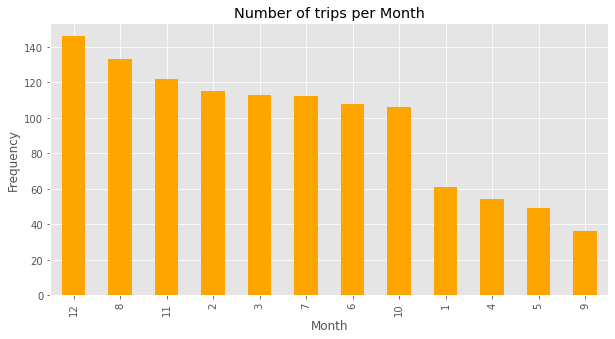

In [18]:
# plot number of trips at each month
x = uber_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

Text(0.5, 1.0, 'Number of trips per hour')

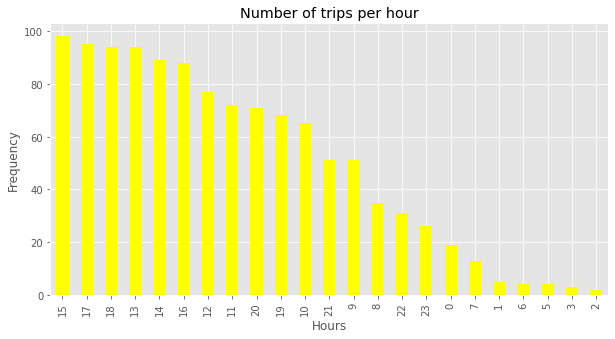

In [21]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='yellow',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

Text(0.5, 1.0, 'Number of trips per purpose')

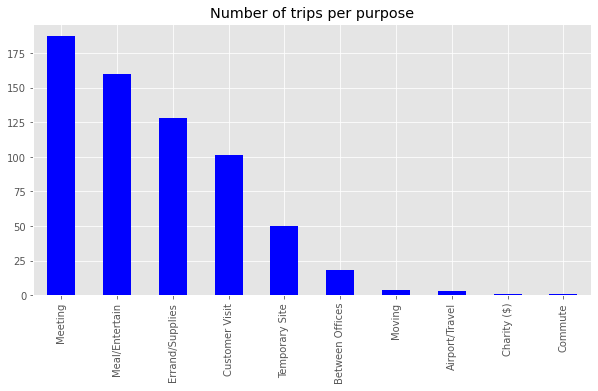

In [24]:
# see how many trips made by each purpose
purpose_time = uber_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='blue') 
plt.title('Number of trips per purpose')

In [ ]:
uber_dis=uber_df["MILES*"]
dis_range_lst=["<=5","5-10","10-15","15-20",">20"]
dis_dic=dict()
for item in dis_range_lst:
    dis_dic[item]=0
for mile in uber_dis.values:
    if mile<=5:
        dis_dic["<=5"]+=1
    elif mile<=10:
        dis_dic["5-10"]+=1
    elif mile <= 15:
        dis_dic["10-15"]+=1
    elif mile<=20:
        dis_dic["15-20"]+=1
    